### <font color='GREEN'> I. Setting the Working Enviornment

In [ ]:
import pandas as pd
import nltk
import math
import seaborn as sns
nltk.download('punkt')
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary
from wordcloud import WordCloud
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
from gdm import mu_method,find_best_k, remove_numeric_and_punctuations # mu_method(A,k,max_iter,init_mode='random')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: ignored

**texte en gras**### <font color='GREEN'> II. Data importation

#### Voila un "Cheat sheet" pour le module pandas
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
full_data=pd.read_csv("NLP_Topic_modeling_Data.csv").head(500)
print(full_data.columns)


Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')


In [ ]:
data = pd.DataFrame(full_data['ABSTRACT'].head(500).apply(remove_numeric_and_punctuations))
print(data['ABSTRACT'].head(10))

0    a evergrowing datasets inside observational as...
1    we propose the framework considering optimal t...
2    nanostructures with open shell transition meta...
3    stars are selfgravitating fluids inside which ...
4    deep neural perception and control networks ar...
5    analyzing job hopping behavior was important c...
6    a need to reason about uncertainty inside larg...
7    period approximation was one of a central topi...
8    nowadays data compressors are applied to many ...
9    inside this work the manybody potential of nb ...
Name: ABSTRACT, dtype: object


In [ ]:
data.head()

,ABSTRACT
0,a evergrowing datasets inside observational as...
1,we propose the framework considering optimal t...
2,nanostructures with open shell transition meta...
3,stars are selfgravitating fluids inside which ...
4,deep neural perception and control networks ar...


In [ ]:
data['tokenized_data'] = [word_tokenize(doc) for doc in data['ABSTRACT']]
data.head()

,ABSTRACT,tokenized_data
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation..."
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt..."
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition..."
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ..."
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo..."


In [ ]:
def stem_docs(doc):
    doc = [word for word in doc if word not in ENGLISH_STOP_WORDS]
    stemmed_words = [SnowballStemmer('english').stem(word) for word in doc]
    return stemmed_words
def word_count(text):
    return len(str(text).split(' '))
def flat_data(words_list):
    text = ""
    for word in words_list:
        text = text+" "+ word
    return (text)
def jaccard_similarity2(set1, set2):
    intersection = len(set1.intersection(set2))
    union = min(len(set1),len(set2))
    similarity = intersection / union if union != 0 else 0  # Avoid division by zero
    return similarity
def jaccard_similarity(row):
    set1 = set(row['ActiveFields'])
    set2 = set(row['DominantTopicContent'])
    intersection = len(set1.intersection(set2))
    union = (min(len(set1),len(set2)))
    similarity = intersection / union if union != 0 else 0  # Avoid division by zero
    return similarity

#### Tokenization and stemming the data

In [ ]:
data['stemmed_data'] = [stem_docs(doc) for doc in data['tokenized_data']]
data['stemmed_data_flat'] = [flat_data(doc) for doc in data['stemmed_data']]
data.head()

,ABSTRACT,tokenized_data,stemmed_data,stemmed_data_flat
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation...","[evergrow, dataset, insid, observ, astronomi, ...",evergrow dataset insid observ astronomi chall...
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt...","[propos, framework, consid, optim, tmatch, exc...",propos framework consid optim tmatch exclud p...
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition...","[nanostructur, open, shell, transit, metal, mo...",nanostructur open shell transit metal molecul...
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ...","[star, selfgravit, fluid, insid, pressur, buoy...",star selfgravit fluid insid pressur buoyanc r...
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo...","[deep, neural, percept, control, network, like...",deep neural percept control network like key ...


In [ ]:
tfidf_object = TfidfVectorizer(max_df=0.85, min_df=3)

In [ ]:
dtm = tfidf_object.fit_transform(data['stemmed_data_flat'])
vocabulaire = tfidf_object.get_feature_names_out()

#### <font color='red'> III.1 wordcloud

In [ ]:
tfidf_dict = dict(zip(tfidf_object.get_feature_names_out(), dtm.sum(axis=0).A1))
wordcloud = WordCloud(width=930, height=500, background_color='Black').generate_from_frequencies(tfidf_dict)
##tfidf_dict

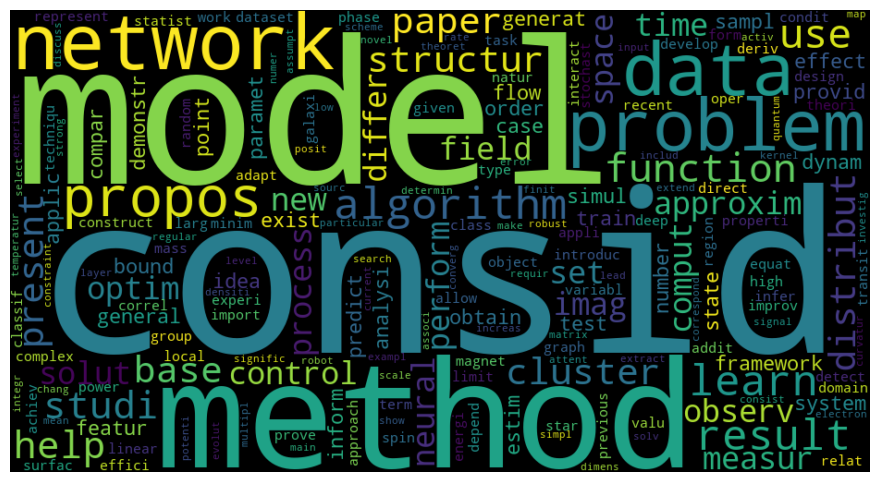

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### <font color='red'> III.2 word count per doc(text)

In [ ]:
data['word_count'] = data['stemmed_data_flat'].apply(word_count)
data.head()

,ABSTRACT,tokenized_data,stemmed_data,stemmed_data_flat,word_count
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation...","[evergrow, dataset, insid, observ, astronomi, ...",evergrow dataset insid observ astronomi chall...,177
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt...","[propos, framework, consid, optim, tmatch, exc...",propos framework consid optim tmatch exclud p...,97
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition...","[nanostructur, open, shell, transit, metal, mo...",nanostructur open shell transit metal molecul...,148
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ...","[star, selfgravit, fluid, insid, pressur, buoy...",star selfgravit fluid insid pressur buoyanc r...,134
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo...","[deep, neural, percept, control, network, like...",deep neural percept control network like key ...,113


In [ ]:
df = pd.DataFrame(data=data['stemmed_data'])
matrix = pd.DataFrame(index=df.index, columns=df.index)

for i in range(len(df)):
    for j in range(len(df)):
        set1 = set(df.iloc[i]['stemmed_data'])
        set2 = set(df.iloc[j]['stemmed_data'])
        matrix.iloc[i, j] = jaccard_similarity2(set1, set2)

In [ ]:
matrix=matrix.astype(float)
matrix.head(2)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.075758,0.146789,0.095745,0.144737,0.150538,0.114583,0.125000,0.25,0.148649,...,0.055556,0.138462,0.115385,0.107143,0.102564,0.136986,0.133333,0.090909,0.145455,0.075
1,0.075758,1.000000,0.121212,0.121212,0.090909,0.121212,0.181818,0.121212,0.20,0.075758,...,0.074074,0.153846,0.106061,0.071429,0.121212,0.106061,0.066667,0.045455,0.109091,0.150


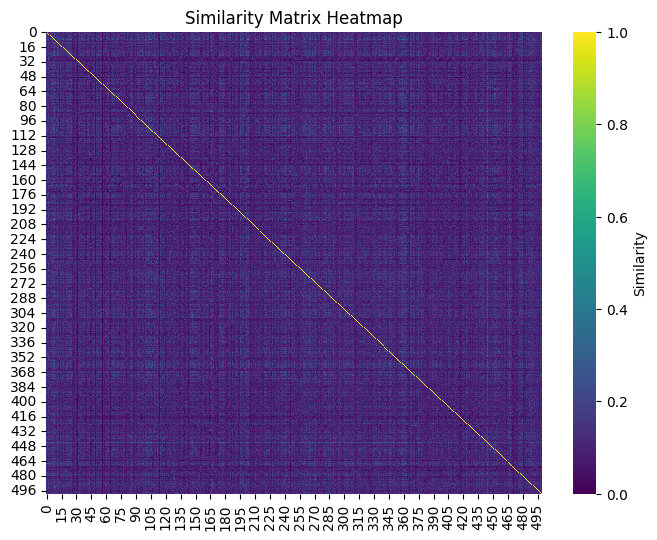

In [ ]:
df = matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df,cmap='viridis', cbar_kws={'label': 'Similarity'})
plt.title('Similarity Matrix Heatmap')
plt.show()

In [ ]:
data['word_count'].describe()
# ces infos vont aider pour cree le diagramme

count    500.000000
mean      98.712000
std       36.032732
min        6.000000
25%       73.000000
50%       97.000000
75%      123.250000
max      186.000000
Name: word_count, dtype: float64

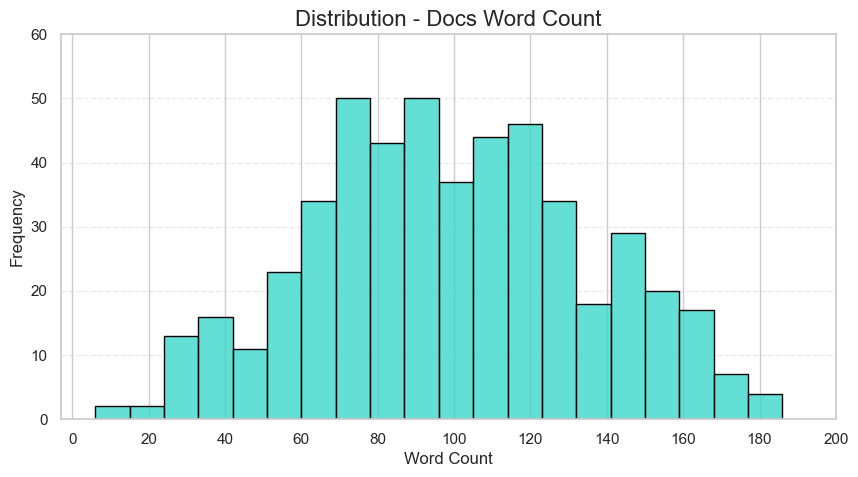

In [ ]:
sns.set(style="whitegrid")  # Set the style

fig, ax = plt.subplots(figsize=(10, 5))

# Use Seaborn's histplot for better aesthetics
sns.histplot(
    data['word_count'],
    bins=20,
    kde=False,
    color='#30d5c8',
    edgecolor='black',  # Border color
    ax=ax

)

# Set titles and labels
ax.set_title('Distribution - Docs Word Count', fontsize=16)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Word Count', fontsize=12)
ax.set_yticks(np.arange(0, 65, 10))
ax.set_xticks(np.arange(0, 210, 20))

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

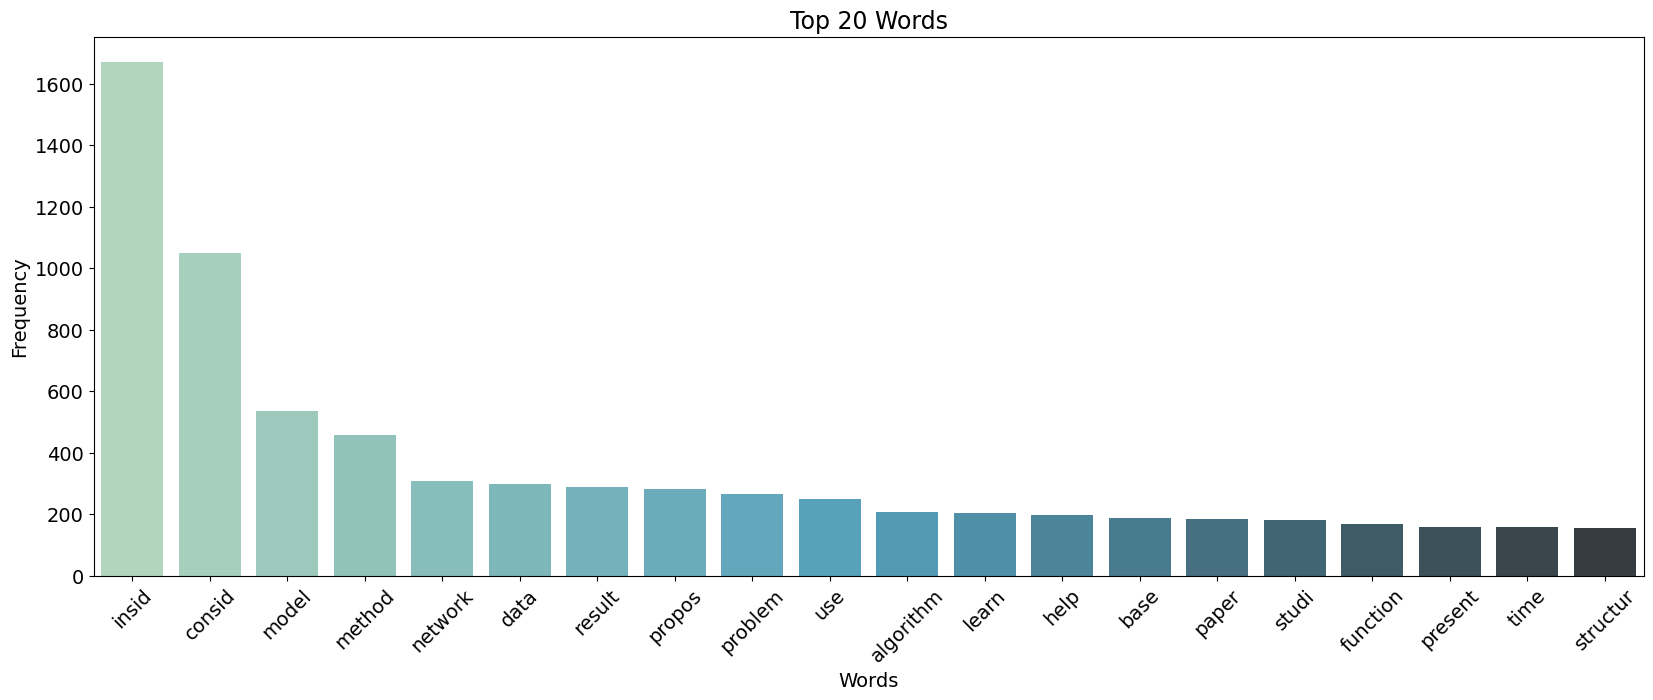

In [ ]:
from collections import Counter

p_text = data['stemmed_data']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)


plt.show()

In [ ]:
def counterWords(word, data):
    counter=0
    for x in data:
        if x == word:
            counter = counter+1
    return (counter/len(data))
data['count insid'] = [ counterWords('insid', text) for text in data['stemmed_data'] ]
data.head()

,ABSTRACT,tokenized_data,stemmed_data,stemmed_data_flat,word_count,count insid
0,a evergrowing datasets inside observational as...,"[a, evergrowing, datasets, inside, observation...","[evergrow, dataset, insid, observ, astronomi, ...",evergrow dataset insid observ astronomi chall...,177,0.062500
1,we propose the framework considering optimal t...,"[we, propose, the, framework, considering, opt...","[propos, framework, consid, optim, tmatch, exc...",propos framework consid optim tmatch exclud p...,97,0.031250
2,nanostructures with open shell transition meta...,"[nanostructures, with, open, shell, transition...","[nanostructur, open, shell, transit, metal, mo...",nanostructur open shell transit metal molecul...,148,0.006803
3,stars are selfgravitating fluids inside which ...,"[stars, are, selfgravitating, fluids, inside, ...","[star, selfgravit, fluid, insid, pressur, buoy...",star selfgravit fluid insid pressur buoyanc r...,134,0.030075
4,deep neural perception and control networks ar...,"[deep, neural, perception, and, control, netwo...","[deep, neural, percept, control, network, like...",deep neural percept control network like key ...,113,0.008929


### NMF decomposition

#### Le score de cohérence mesure la similarité sémantique entre les mots d'un même sujet. Un score de cohérence élevé indique que les mots du sujet sont liés de manière sémantique, ce qui suggère un modèle de topic plus interprétable

In [ ]:
#nmf_model = NMF(n_components=6)

In [ ]:
# domaine de recherche
n_components_range = range(5, 40)
gensim_dict = Dictionary(data['stemmed_data'])
# liste vide
coherence_scores = []

# les iterations
for n_components in n_components_range:
    # Construction de class nmf :
    nmf_model = NMF(n_components=n_components)
    w = nmf_model.fit_transform(dtm)
    h = nmf_model.components_


    # extraction des topic pour calculer le score coherence
    feature_names = tfidf_object.get_feature_names_out()
    top_words_per_topic = []
    for topic_idx, topic in enumerate(w):
        top_words_idx = topic.argsort()[:-10-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        top_words_per_topic.append(top_words)


    coherence_model = CoherenceModel(topics=top_words_per_topic, texts=data['stemmed_data'], dictionary=gensim_dict, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packa

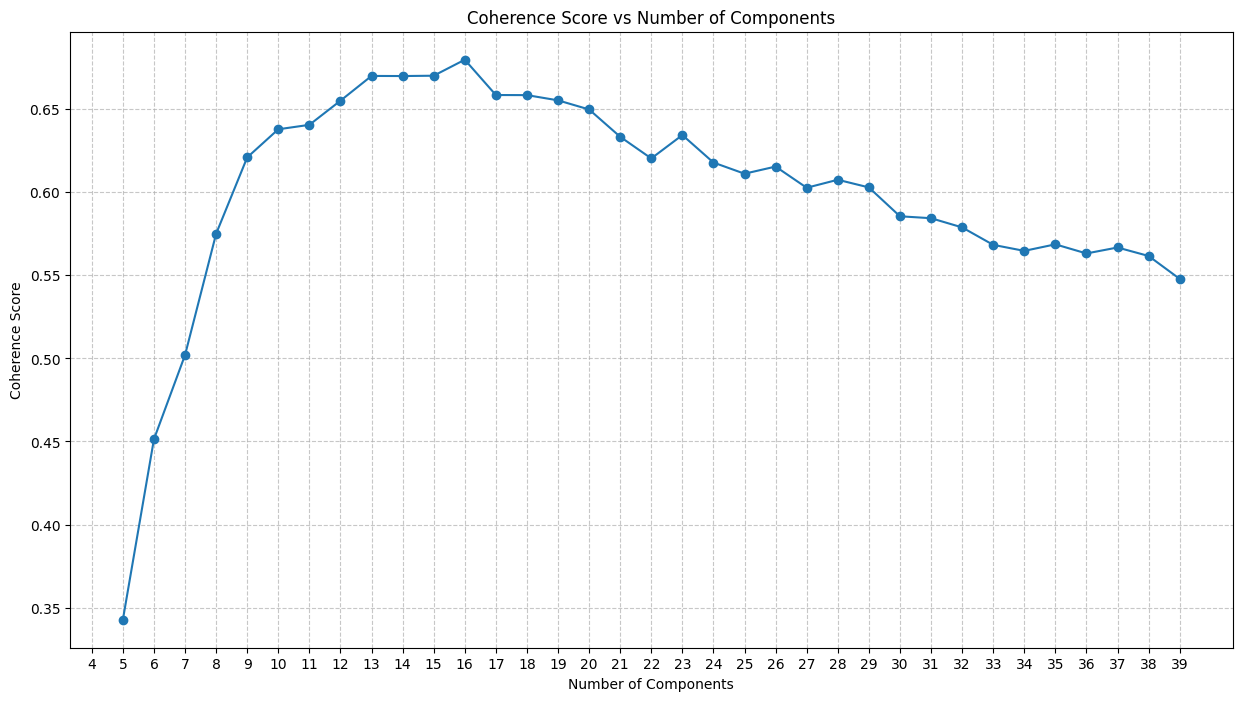

In [ ]:
# les resultats :
plt.figure(figsize=(15, 8))
plt.plot(n_components_range, coherence_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Coherence Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(4, max(n_components_range)+1, 1))
plt.title('Coherence Score vs Number of Components')
plt.show()

D'apres ce graph on remarque que les valuers [13, 14, 15, 16] donne la meilleur decompositions ou les sujet sont coherent ... dans les prochaine etapes on va essayer de cree 4 differents models avec les valeurs trouvé et on va choisir le meilleurs parmis eux

texte en italique# Model 1 , k=13

In [ ]:
k = 13
data_k_13 = data.drop(columns=["tokenized_data" ,"stemmed_data","stemmed_data_flat","count insid","word_count"])

In [ ]:
nmf_model = NMF(n_components=k)
w = nmf_model.fit_transform(dtm)
h = nmf_model.components_

In [ ]:
topic_dict={}
for topic_idx, topic in enumerate(h):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [vocabulaire[i] for i in top_terms_idx]
    tem_list=[]
    for term in top_terms:
        tem_list.append(term)
    topic_dict[f"Topic_{topic_idx + 1}"]=tem_list
topic_dict

{'Topic_1': ['method',
  'learn',
  'imag',
  'featur',
  'data',
  'propos',
  'idea',
  'object',
  'dataset',
  'visual'],
 'Topic_2': ['magnet',
  'spin',
  'field',
  'phase',
  'superconduct',
  'state',
  'electron',
  'interact',
  'quantum',
  'temperatur'],
 'Topic_3': ['problem',
  'solut',
  'function',
  'optim',
  'consid',
  'equat',
  'regular',
  'convex',
  'comput',
  'solv'],
 'Topic_4': ['network',
  'neural',
  'layer',
  'deep',
  'train',
  'learn',
  'activ',
  'convolut',
  'task',
  'consid'],
 'Topic_5': ['network',
  'influenc',
  'node',
  'communiti',
  'dynam',
  'spread',
  'user',
  'social',
  'tempor',
  'maxim'],
 'Topic_6': ['flow',
  'curvatur',
  'ricci',
  'manifold',
  'bound',
  'prove',
  'singular',
  'asymptot',
  'solut',
  'surfac'],
 'Topic_7': ['galaxi',
  'mass',
  'star',
  'observ',
  'stellar',
  'format',
  'redshift',
  'planet',
  'gas',
  'emiss'],
 'Topic_8': ['estim',
  'distribut',
  'statist',
  'test',
  'consid',
  'approx

In [ ]:
topic_columns = [f'Topic_{i+1}' for i in range(k)]
all_topics = pd.DataFrame(data=w, columns=topic_columns)
data_k_13 = pd.concat([data_k_13, all_topics], axis=1)

In [ ]:
data_k_13

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13
0,a evergrowing datasets inside observational as...,0.080343,0.021306,0.000000,0.000000,0.025697,0.010418,0.052128,0.004014,0.000000,0.000350,0.000000,0.007387,0.031863
1,we propose the framework considering optimal t...,0.000000,0.000000,0.112319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338877,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.021078,0.228659,0.005622,0.000000,0.000000,0.000000,0.000000,0.037157,0.052976,0.000000,0.000000,0.006777,0.000000
3,stars are selfgravitating fluids inside which ...,0.003221,0.123152,0.005420,0.000000,0.000000,0.000000,0.096675,0.000000,0.000000,0.013237,0.000000,0.000000,0.000000
4,deep neural perception and control networks ar...,0.048447,0.000000,0.000000,0.079299,0.145751,0.000000,0.000000,0.000000,0.084552,0.050427,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.000000,0.022704,0.000000,0.021057,0.000000,0.000000,0.000000,0.000000,0.002247,0.222917,0.023637,0.000000
496,currently a detection of very high energy gamm...,0.029383,0.047870,0.017056,0.000000,0.002135,0.000000,0.084282,0.000000,0.016451,0.000000,0.028962,0.000000,0.002516
497,a existence of closed loops of degeneracies in...,0.000000,0.068164,0.000000,0.000000,0.000544,0.007245,0.000000,0.000000,0.013877,0.000277,0.000000,0.105119,0.006696
498,robust pca a problem of pca inside a presence ...,0.027613,0.008357,0.004618,0.000000,0.000000,0.001009,0.000000,0.055738,0.000000,0.025842,0.061770,0.007177,0.000000


In [ ]:
row_sums = data_k_13[['Topic_' + str(i+1) for i in range(k)]].sum(axis=1)
print(row_sums.head(10))

0    0.233507
1    0.451197
2    0.352270
3    0.241705
4    0.408476
5    0.363280
6    0.337321
7    0.369843
8    0.210676
9    0.343464
dtype: float64


In [ ]:
row_sums = data_k_13[topic_columns].sum(axis=1)
data_k_13[topic_columns] = data_k_13[topic_columns].div(row_sums, axis=0)

In [ ]:
data_k_13

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13
0,a evergrowing datasets inside observational as...,0.344070,0.091244,0.000000,0.000000,0.110050,0.044618,0.223241,0.017191,0.000000,0.001499,0.000000,0.031634,0.136453
1,we propose the framework considering optimal t...,0.000000,0.000000,0.248936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751064,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.059834,0.649103,0.015960,0.000000,0.000000,0.000000,0.000000,0.105479,0.150385,0.000000,0.000000,0.019239,0.000000
3,stars are selfgravitating fluids inside which ...,0.013325,0.509513,0.022424,0.000000,0.000000,0.000000,0.399971,0.000000,0.000000,0.054767,0.000000,0.000000,0.000000
4,deep neural perception and control networks ar...,0.118605,0.000000,0.000000,0.194133,0.356816,0.000000,0.000000,0.000000,0.206994,0.123452,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.000000,0.077604,0.000000,0.071974,0.000000,0.000000,0.000000,0.000000,0.007680,0.761948,0.080793,0.000000
496,currently a detection of very high energy gamm...,0.128503,0.209356,0.074591,0.000000,0.009336,0.000000,0.368598,0.000000,0.071948,0.000000,0.126663,0.000000,0.011005
497,a existence of closed loops of degeneracies in...,0.000000,0.337579,0.000000,0.000000,0.002694,0.035880,0.000000,0.000000,0.068723,0.001370,0.000000,0.520595,0.033159
498,robust pca a problem of pca inside a presence ...,0.143725,0.043497,0.024036,0.000000,0.000000,0.005252,0.000000,0.290114,0.000000,0.134506,0.321511,0.037358,0.000000


In [ ]:
data_k_13['DominantTopic'] = data_k_13[topic_columns].idxmax(axis=1)

## max topic
#max_contributions = data_k_13[topic_columns].max(axis=1)

## (1/4 of the maximum)
#threshold = max_contributions / 4.0

## all
#data_k_13['DominantTopicContent'] = data_k_13.apply(lambda row: ', '.join(top_terms for top_terms in row[topic_columns].sort_values(ascending=False).index if row[top_terms] >= threshold[row.name]), axis=1)

In [ ]:
data_k_13['DominantTopic'] = data_k_13[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_13[topic_columns].max(axis=1)

# (1/4 of the maximum)
threshold = max_contributions / 4

# all
data_k_13['DominantTopicContent'] = data_k_13.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_13.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.344070,0.091244,0.000000,0.000000,0.110050,0.044618,0.223241,0.017191,0.000000,0.001499,0.000000,0.031634,0.136453,Topic_1,"method, learn, imag, featur, data, propos, ide..."
1,we propose the framework considering optimal t...,0.000000,0.000000,0.248936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751064,0.000000,0.000000,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,0.059834,0.649103,0.015960,0.000000,0.000000,0.000000,0.000000,0.105479,0.150385,0.000000,0.000000,0.019239,0.000000,Topic_2,"magnet, spin, field, phase, superconduct, stat..."
3,stars are selfgravitating fluids inside which ...,0.013325,0.509513,0.022424,0.000000,0.000000,0.000000,0.399971,0.000000,0.000000,0.054767,0.000000,0.000000,0.000000,Topic_2,"magnet, spin, field, phase, superconduct, stat..."
4,deep neural perception and control networks ar...,0.118605,0.000000,0.000000,0.194133,0.356816,0.000000,0.000000,0.000000,0.206994,0.123452,0.000000,0.000000,0.000000,Topic_5,"method, learn, imag, featur, data, propos, ide..."


In [ ]:
data_k_13.drop(columns=topic_columns, inplace=True)

In [ ]:
data_k_13.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat..."


In [ ]:
temps_data = full_data.drop(columns=['id','ABSTRACT'])

In [ ]:
data_k_13 = pd.concat([data_k_13, temps_data], axis=1)

In [ ]:
data_k_13.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
binary_columns = data_k_13.columns[3:]
data_k_13.columns[3:]

Index(['Computer Science', 'Mathematics', 'Physics', 'Statistics',
       'Analysis of PDEs', 'Applications', 'Artificial Intelligence',
       'Astrophysics of Galaxies', 'Computation and Language',
       'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [ ]:
data_k_13['ActiveFields'] = data_k_13[binary_columns].apply(lambda row: ', '.join(binary_columns[row == 1]), axis=1)
data_k_13.drop(columns=binary_columns, inplace=True)

In [ ]:
data_k_13

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide...","Physics, Cosmology and Nongalactic Astrophysic..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...","Computer Science, Data Structures and Algorithms"
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat...","Physics, Strongly Correlated Electrons"
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, spin, field, phase, superconduct, stat...","Physics, Fluid Dynamics"
4,deep neural perception and control networks ar...,Topic_5,"method, learn, imag, featur, data, propos, ide...","Computer Science, Computer Vision and Pattern ..."
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,"algorithm, agent, consid, propos, match, time,...","Computer Science, Data Structures and Algorithms"
496,currently a detection of very high energy gamm...,Topic_7,"method, learn, imag, featur, data, propos, ide...","Physics, Instrumentation and Methods for Astro..."
497,a existence of closed loops of degeneracies in...,Topic_12,"magnet, spin, field, phase, superconduct, stat...","Physics, Materials Science"
498,robust pca a problem of pca inside a presence ...,Topic_11,"method, learn, imag, featur, data, propos, ide...","Statistics, Machine Learning"


In [ ]:
data_k_13['DominantTopicContent']=data_k_13['DominantTopicContent'].apply(remove_numeric_and_punctuations)
data_k_13['ActiveFields']=data_k_13['ActiveFields'].apply(remove_numeric_and_punctuations)

In [ ]:
data_k_13

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,method learn imag featur data propos idea obje...,Physics Cosmology and Nongalactic Astrophysics...
1,we propose the framework considering optimal t...,Topic_11,problem solut function optim consid equat regu...,Computer Science Data Structures and Algorithms
2,nanostructures with open shell transition meta...,Topic_2,magnet spin field phase superconduct state ele...,Physics Strongly Correlated Electrons
3,stars are selfgravitating fluids inside which ...,Topic_2,magnet spin field phase superconduct state ele...,Physics Fluid Dynamics
4,deep neural perception and control networks ar...,Topic_5,method learn imag featur data propos idea obje...,Computer Science Computer Vision and Pattern R...
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,algorithm agent consid propos match time point...,Computer Science Data Structures and Algorithms
496,currently a detection of very high energy gamm...,Topic_7,method learn imag featur data propos idea obje...,Physics Instrumentation and Methods for Astrop...
497,a existence of closed loops of degeneracies in...,Topic_12,magnet spin field phase superconduct state ele...,Physics Materials Science
498,robust pca a problem of pca inside a presence ...,Topic_11,method learn imag featur data propos idea obje...,Statistics Machine Learning


In [ ]:
data_k_13['DominantTopicContent'] = [word_tokenize(doc) for doc in data_k_13['DominantTopicContent']]
data_k_13['DominantTopicContent'] = [stem_docs(doc) for doc in data_k_13['DominantTopicContent']]
data_k_13['ActiveFields'] = [word_tokenize(doc) for doc in data_k_13['ActiveFields']]
data_k_13['ActiveFields'] = [stem_docs(doc) for doc in data_k_13['ActiveFields']]
data_k_13['ActiveFields'] = data_k_13['ActiveFields'].apply(lambda x: list(set(x)))

In [ ]:
data_k_13['similarity'] = data_k_13.apply(jaccard_similarity, axis=1)

In [ ]:
data_k_13.head(14)

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_1,"[method, learn, imag, featur, data, propo, ide...","[astrophys, method, physic, cosmolog, nongalac...",0.166667
1,we propose the framework considering optimal t...,Topic_11,"[problem, solut, function, optim, consid, equa...","[data, scienc, algorithm, comput, structur]",0.400000
2,nanostructures with open shell transition meta...,Topic_2,"[magnet, spin, field, phase, superconduct, sta...","[physic, correl, electron, strong]",0.250000
3,stars are selfgravitating fluids inside which ...,Topic_2,"[magnet, spin, field, phase, superconduct, sta...","[physic, fluid, dynam]",0.000000
4,deep neural perception and control networks ar...,Topic_5,"[method, learn, imag, featur, data, propo, ide...","[scienc, vision, machin, learn, recognit, patt...",0.142857
5,analyzing job hopping behavior was important c...,Topic_6,"[method, learn, imag, featur, data, propo, ide...","[inform, network, social, scienc, comput]",0.400000
6,a need to reason about uncertainty inside larg...,Topic_3,"[method, learn, imag, featur, data, propo, ide...","[machin, learn, statist]",0.666667
7,period approximation was one of a central topi...,Topic_8,"[estim, distribut, statist, test, consid, appr...","[astrophys, statist, physic, machin, learn, ap...",0.250000
8,nowadays data compressors are applied to many ...,Topic_8,"[method, learn, imag, featur, data, propo, ide...","[mathemat, inform, statist, scienc, theori, co...",0.166667
9,inside this work the manybody potential of nb ...,Topic_13,"[cluster, graph, spectral, defect, radio, xray...","[scienc, physic, materi]",0.000000


In [ ]:
similarities_list=[]
similarities_list.append(data_k_13["similarity"].mean())
print("le degree de similarité entre les topics et classes de chaque doc :", data_k_13['similarity'].mean())

le degree de similarité entre les topics et classes de chaque doc : 0.22883434343434342


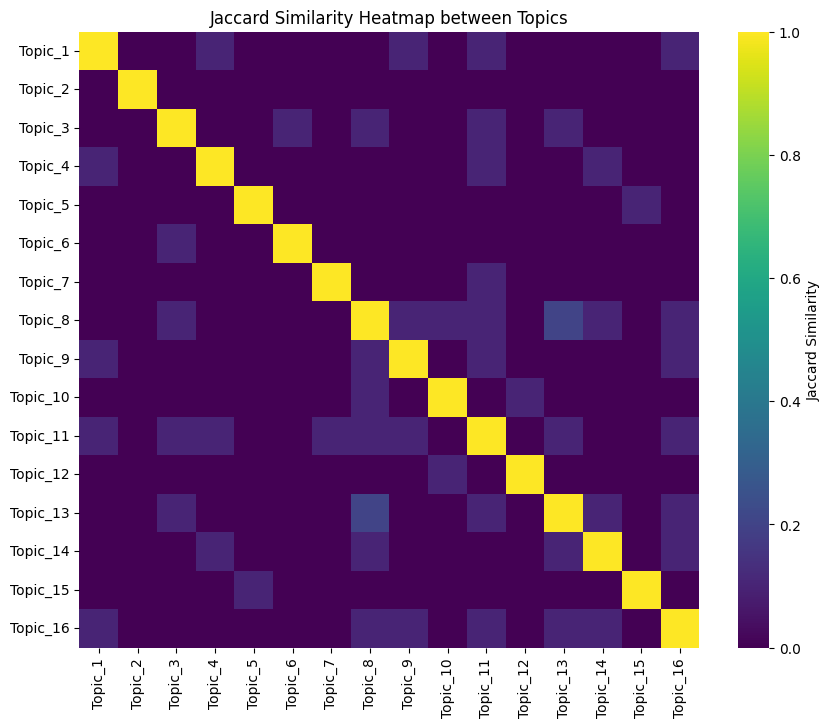

In [ ]:
df = pd.DataFrame(topic_dict)


matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for topic1 in df_topics.columns:
    for topic2 in df_topics.columns:
        set1 = set(df_topics[topic1])
        set2 = set(df_topics[topic2])
        similarity = jaccard_similarity2(set1, set2)
        matrix.loc[topic1, topic2] = similarity

# Convert the matrix values to float
matrix = matrix.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Jaccard Similarity Heatmap between Topics')
plt.show()

# Model 2 , k=14

In [ ]:
k = 14
data_k_14 = data.drop(columns=["tokenized_data" ,"stemmed_data","stemmed_data_flat","count insid","word_count"])

In [ ]:
nmf_model = NMF(n_components=k)
w = nmf_model.fit_transform(dtm)
h = nmf_model.components_

In [ ]:
topic_dict={}
for topic_idx, topic in enumerate(h):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [vocabulaire[i] for i in top_terms_idx]
    tem_list=[]
    for term in top_terms:
        tem_list.append(term)
    topic_dict[f"Topic_{topic_idx + 1}"]=tem_list
topic_dict

{'Topic_1': ['method',
  'learn',
  'imag',
  'featur',
  'data',
  'propos',
  'idea',
  'object',
  'dataset',
  'visual'],
 'Topic_2': ['magnet',
  'field',
  'superconduct',
  'state',
  'temperatur',
  'electron',
  'surfac',
  'pair',
  'phase',
  'transit'],
 'Topic_3': ['problem',
  'solut',
  'function',
  'optim',
  'consid',
  'equat',
  'regular',
  'convex',
  'comput',
  'solv'],
 'Topic_4': ['network',
  'neural',
  'layer',
  'deep',
  'train',
  'learn',
  'activ',
  'convolut',
  'task',
  'consid'],
 'Topic_5': ['network',
  'influenc',
  'node',
  'communiti',
  'dynam',
  'spread',
  'social',
  'user',
  'tempor',
  'maxim'],
 'Topic_6': ['flow',
  'curvatur',
  'ricci',
  'manifold',
  'bound',
  'prove',
  'singular',
  'asymptot',
  'solut',
  'surfac'],
 'Topic_7': ['cluster',
  'graph',
  'spectral',
  'defect',
  'radio',
  'xray',
  'similar',
  'point',
  'kmean',
  'gas'],
 'Topic_8': ['estim',
  'distribut',
  'statist',
  'test',
  'consid',
  'approxim

In [ ]:
topic_columns = [f'Topic_{i+1}' for i in range(k)]
all_topics = pd.DataFrame(data=w, columns=topic_columns)
data_k_14 = pd.concat([data_k_14, all_topics], axis=1)

In [ ]:
data_k_14

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
0,a evergrowing datasets inside observational as...,0.074987,0.000000,0.000000,0.000000,0.021316,0.009279,0.031838,0.002775,0.000000,0.000000,0.000000,0.003471,0.069478,0.052907
1,we propose the framework considering optimal t...,0.000000,0.000000,0.109112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325158,0.000000,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.018338,0.135800,0.004573,0.000000,0.000000,0.000000,0.000000,0.036423,0.057051,0.000000,0.000000,0.000000,0.233891,0.000000
3,stars are selfgravitating fluids inside which ...,0.001468,0.167474,0.004356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016790,0.000000,0.000000,0.000000,0.084882
4,deep neural perception and control networks ar...,0.045475,0.000000,0.000000,0.074355,0.138090,0.000000,0.000000,0.000000,0.085832,0.047738,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.001384,0.021667,0.000000,0.019932,0.000000,0.000000,0.000000,0.000000,0.002249,0.213219,0.024520,0.000000,0.000000
496,currently a detection of very high energy gamm...,0.027308,0.061245,0.016210,0.000000,0.003002,0.000000,0.002137,0.000000,0.017389,0.000000,0.027581,0.000000,0.000000,0.080507
497,a existence of closed loops of degeneracies in...,0.000000,0.020067,0.000000,0.000000,0.000000,0.008158,0.007407,0.000000,0.013805,0.000000,0.000000,0.082355,0.125368,0.000000
498,robust pca a problem of pca inside a presence ...,0.026136,0.001585,0.004341,0.000000,0.000000,0.001094,0.000000,0.055557,0.000000,0.023229,0.059383,0.004838,0.018605,0.000000


In [ ]:
row_sums = data_k_14[['Topic_' + str(i+1) for i in range(k)]].sum(axis=1)
print(row_sums.head(10))

0    0.266051
1    0.434270
2    0.486077
3    0.274969
4    0.391490
5    0.353791
6    0.331148
7    0.371580
8    0.206262
9    0.344841
dtype: float64


Les valeurs ne sommmes pas normaliser !

In [ ]:
row_sums = data_k_14[topic_columns].sum(axis=1)
data_k_14[topic_columns] = data_k_14[topic_columns].div(row_sums, axis=0)

In [ ]:
data_k_14

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
0,a evergrowing datasets inside observational as...,0.281852,0.000000,0.000000,0.000000,0.080122,0.034876,0.119669,0.010431,0.000000,0.000000,0.000000,0.013047,0.261145,0.198859
1,we propose the framework considering optimal t...,0.000000,0.000000,0.251254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748746,0.000000,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.037726,0.279379,0.009408,0.000000,0.000000,0.000000,0.000000,0.074933,0.117371,0.000000,0.000000,0.000000,0.481182,0.000000
3,stars are selfgravitating fluids inside which ...,0.005337,0.609064,0.015841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061060,0.000000,0.000000,0.000000,0.308697
4,deep neural perception and control networks ar...,0.116158,0.000000,0.000000,0.189929,0.352729,0.000000,0.000000,0.000000,0.219244,0.121940,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.004890,0.076568,0.000000,0.070439,0.000000,0.000000,0.000000,0.000000,0.007947,0.753504,0.086652,0.000000,0.000000
496,currently a detection of very high energy gamm...,0.116019,0.260198,0.068867,0.000000,0.012753,0.000000,0.009080,0.000000,0.073875,0.000000,0.117176,0.000000,0.000000,0.342031
497,a existence of closed loops of degeneracies in...,0.000000,0.078034,0.000000,0.000000,0.000000,0.031722,0.028802,0.000000,0.053681,0.000000,0.000000,0.320248,0.487512,0.000000
498,robust pca a problem of pca inside a presence ...,0.134189,0.008137,0.022286,0.000000,0.000000,0.005615,0.000000,0.285246,0.000000,0.119266,0.304893,0.024841,0.095526,0.000000


In [ ]:
data_k_14['DominantTopic'] = data_k_14[topic_columns].idxmax(axis=1)

## max topic
#max_contributions = data_k_13[topic_columns].max(axis=1)

## (1/4 of the maximum)
#threshold = max_contributions / 4.0

## all
#data_k_13['DominantTopicContent'] = data_k_13.apply(lambda row: ', '.join(top_terms for top_terms in row[topic_columns].sort_values(ascending=False).index if row[top_terms] >= threshold[row.name]), axis=1)

In [ ]:
data_k_14['DominantTopic'] = data_k_14[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_14[topic_columns].max(axis=1)

# (1/2 of the maximum)
threshold = max_contributions / 4

# all
data_k_14['DominantTopicContent'] = data_k_14.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_14.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.281852,0.000000,0.000000,0.000000,0.080122,0.034876,0.119669,0.010431,0.000000,0.00000,0.000000,0.013047,0.261145,0.198859,Topic_1,"method, learn, imag, featur, data, propos, ide..."
1,we propose the framework considering optimal t...,0.000000,0.000000,0.251254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.748746,0.000000,0.000000,0.000000,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,0.037726,0.279379,0.009408,0.000000,0.000000,0.000000,0.000000,0.074933,0.117371,0.00000,0.000000,0.000000,0.481182,0.000000,Topic_13,"magnet, field, superconduct, state, temperatur..."
3,stars are selfgravitating fluids inside which ...,0.005337,0.609064,0.015841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06106,0.000000,0.000000,0.000000,0.308697,Topic_2,"magnet, field, superconduct, state, temperatur..."
4,deep neural perception and control networks ar...,0.116158,0.000000,0.000000,0.189929,0.352729,0.000000,0.000000,0.000000,0.219244,0.12194,0.000000,0.000000,0.000000,0.000000,Topic_5,"method, learn, imag, featur, data, propos, ide..."


In [ ]:
data_k_14.drop(columns=topic_columns, inplace=True)

In [ ]:
data_k_14.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,Topic_13,"magnet, field, superconduct, state, temperatur..."


In [ ]:
temps_data = full_data.drop(columns=['id','ABSTRACT'])

In [ ]:
data_k_14 = pd.concat([data_k_14, temps_data], axis=1)

In [ ]:
data_k_14.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nanostructures with open shell transition meta...,Topic_13,"magnet, field, superconduct, state, temperatur...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
binary_columns = data_k_14.columns[3:]
data_k_14.columns[3:]

Index(['Computer Science', 'Mathematics', 'Physics', 'Statistics',
       'Analysis of PDEs', 'Applications', 'Artificial Intelligence',
       'Astrophysics of Galaxies', 'Computation and Language',
       'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [ ]:
data_k_14['ActiveFields'] = data_k_14[binary_columns].apply(lambda row: ', '.join(binary_columns[row == 1]), axis=1)
data_k_14.drop(columns=binary_columns, inplace=True)

In [ ]:
data_k_14

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,"method, learn, imag, featur, data, propos, ide...","Physics, Cosmology and Nongalactic Astrophysic..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...","Computer Science, Data Structures and Algorithms"
2,nanostructures with open shell transition meta...,Topic_13,"magnet, field, superconduct, state, temperatur...","Physics, Strongly Correlated Electrons"
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, field, superconduct, state, temperatur...","Physics, Fluid Dynamics"
4,deep neural perception and control networks ar...,Topic_5,"method, learn, imag, featur, data, propos, ide...","Computer Science, Computer Vision and Pattern ..."
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,"algorithm, agent, consid, propos, match, time,...","Computer Science, Data Structures and Algorithms"
496,currently a detection of very high energy gamm...,Topic_14,"method, learn, imag, featur, data, propos, ide...","Physics, Instrumentation and Methods for Astro..."
497,a existence of closed loops of degeneracies in...,Topic_13,"algebra, group, modul, construct, finit, quoti...","Physics, Materials Science"
498,robust pca a problem of pca inside a presence ...,Topic_11,"method, learn, imag, featur, data, propos, ide...","Statistics, Machine Learning"


In [ ]:
data_k_14['DominantTopicContent']=data_k_14['DominantTopicContent'].apply(remove_numeric_and_punctuations)
data_k_14['ActiveFields']=data_k_14['ActiveFields'].apply(remove_numeric_and_punctuations)

In [ ]:
data_k_14

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,method learn imag featur data propos idea obje...,Physics Cosmology and Nongalactic Astrophysics...
1,we propose the framework considering optimal t...,Topic_11,problem solut function optim consid equat regu...,Computer Science Data Structures and Algorithms
2,nanostructures with open shell transition meta...,Topic_13,magnet field superconduct state temperatur ele...,Physics Strongly Correlated Electrons
3,stars are selfgravitating fluids inside which ...,Topic_2,magnet field superconduct state temperatur ele...,Physics Fluid Dynamics
4,deep neural perception and control networks ar...,Topic_5,method learn imag featur data propos idea obje...,Computer Science Computer Vision and Pattern R...
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,algorithm agent consid propos match time point...,Computer Science Data Structures and Algorithms
496,currently a detection of very high energy gamm...,Topic_14,method learn imag featur data propos idea obje...,Physics Instrumentation and Methods for Astrop...
497,a existence of closed loops of degeneracies in...,Topic_13,algebra group modul construct finit quotient s...,Physics Materials Science
498,robust pca a problem of pca inside a presence ...,Topic_11,method learn imag featur data propos idea obje...,Statistics Machine Learning


In [ ]:
data_k_14['DominantTopicContent'] = [word_tokenize(doc) for doc in data_k_14['DominantTopicContent']]
data_k_14['DominantTopicContent'] = [stem_docs(doc) for doc in data_k_14['DominantTopicContent']]
data_k_14['ActiveFields'] = [word_tokenize(doc) for doc in data_k_14['ActiveFields']]
data_k_14['ActiveFields'] = [stem_docs(doc) for doc in data_k_14['ActiveFields']]
data_k_14['ActiveFields'] = data_k_14['ActiveFields'].apply(lambda x: list(set(x)))

In [ ]:
data_k_14['similarity'] = data_k_14.apply(jaccard_similarity, axis=1)

In [ ]:
data_k_14.head(14)

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_1,"[method, learn, imag, featur, data, propo, ide...","[astrophys, method, physic, cosmolog, nongalac...",0.166667
1,we propose the framework considering optimal t...,Topic_11,"[problem, solut, function, optim, consid, equa...","[data, scienc, algorithm, comput, structur]",0.400000
2,nanostructures with open shell transition meta...,Topic_13,"[magnet, field, superconduct, state, temperatu...","[physic, correl, electron, strong]",0.250000
3,stars are selfgravitating fluids inside which ...,Topic_2,"[magnet, field, superconduct, state, temperatu...","[physic, fluid, dynam]",0.000000
4,deep neural perception and control networks ar...,Topic_5,"[method, learn, imag, featur, data, propo, ide...","[scienc, vision, machin, learn, recognit, patt...",0.142857
5,analyzing job hopping behavior was important c...,Topic_6,"[method, learn, imag, featur, data, propo, ide...","[inform, network, social, scienc, comput]",0.400000
6,a need to reason about uncertainty inside larg...,Topic_3,"[method, learn, imag, featur, data, propo, ide...","[machin, learn, statist]",0.666667
7,period approximation was one of a central topi...,Topic_8,"[estim, distribut, statist, test, consid, appr...","[astrophys, statist, physic, machin, learn, ap...",0.250000
8,nowadays data compressors are applied to many ...,Topic_8,"[method, learn, imag, featur, data, propo, ide...","[mathemat, inform, statist, scienc, theori, co...",0.166667
9,inside this work the manybody potential of nb ...,Topic_7,"[cluster, graph, spectral, defect, radio, xray...","[scienc, physic, materi]",0.000000


In [ ]:
print("le degree de similarité entre les topics et classes de chaque doc :", data_k_14['similarity'].mean())
similarities_list.append(data_k_14["similarity"].mean())

le degree de similarité entre les topics et classes de chaque doc : 0.22064862914862915


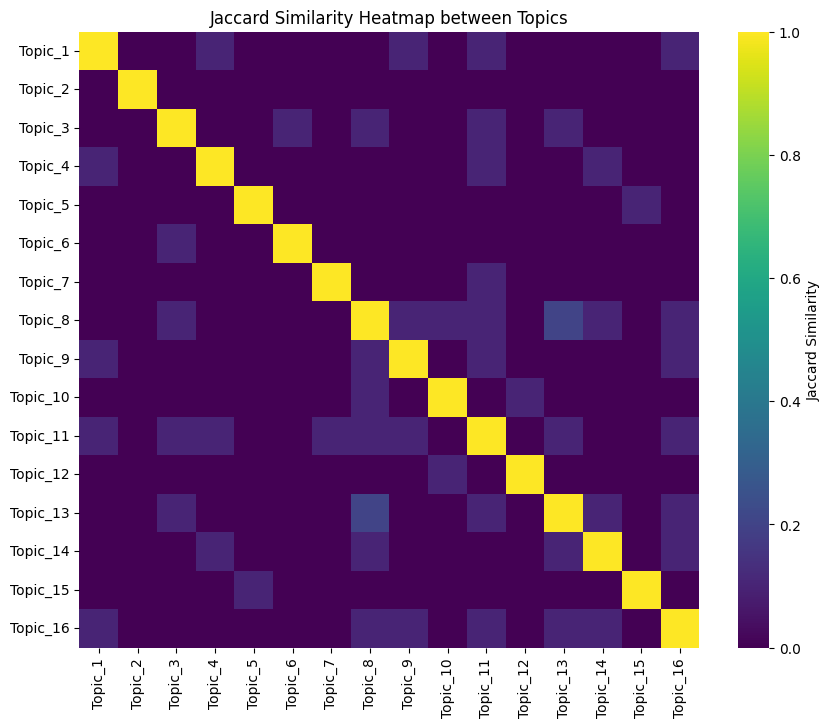

In [ ]:
df = pd.DataFrame(topic_dict)


matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for topic1 in df_topics.columns:
    for topic2 in df_topics.columns:
        set1 = set(df_topics[topic1])
        set2 = set(df_topics[topic2])
        similarity = jaccard_similarity2(set1, set2)
        matrix.loc[topic1, topic2] = similarity

# Convert the matrix values to float
matrix = matrix.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Jaccard Similarity Heatmap between Topics')
plt.show()

# Model 3 , k=15

In [ ]:
k = 15
data_k_15 = data.drop(columns=["tokenized_data" ,"stemmed_data","stemmed_data_flat","count insid","word_count"])

In [ ]:
nmf_model = NMF(n_components=k)
w = nmf_model.fit_transform(dtm)
h = nmf_model.components_

In [ ]:
topic_dict={}
for topic_idx, topic in enumerate(h):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [vocabulaire[i] for i in top_terms_idx]
    tem_list=[]
    for term in top_terms:
        tem_list.append(term)
    topic_dict[f"Topic_{topic_idx + 1}"]=tem_list
topic_dict

{'Topic_1': ['method',
  'imag',
  'featur',
  'object',
  'propos',
  'data',
  'extract',
  'inform',
  'dataset',
  'visual'],
 'Topic_2': ['magnet',
  'spin',
  'field',
  'phase',
  'superconduct',
  'state',
  'electron',
  'interact',
  'quantum',
  'symmetri'],
 'Topic_3': ['problem',
  'solut',
  'function',
  'optim',
  'consid',
  'equat',
  'regular',
  'convex',
  'comput',
  'solv'],
 'Topic_4': ['network',
  'neural',
  'layer',
  'deep',
  'train',
  'activ',
  'convolut',
  'consid',
  'recurr',
  'architectur'],
 'Topic_5': ['galaxi',
  'mass',
  'redshift',
  'format',
  'observ',
  'stellar',
  'gas',
  'star',
  'evolut',
  'halo'],
 'Topic_6': ['flow',
  'curvatur',
  'ricci',
  'manifold',
  'bound',
  'prove',
  'singular',
  'asymptot',
  'solut',
  'surfac'],
 'Topic_7': ['cluster',
  'graph',
  'spectral',
  'defect',
  'radio',
  'xray',
  'similar',
  'point',
  'kmean',
  'cut'],
 'Topic_8': ['model',
  'speech',
  'languag',
  'generat',
  'word',
  'segm

In [ ]:
topic_columns = [f'Topic_{i+1}' for i in range(k)]
all_topics = pd.DataFrame(data=w, columns=topic_columns)
data_k_15 = pd.concat([data_k_15, all_topics], axis=1)

In [ ]:
data_k_14

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_1,"[method, learn, imag, featur, data, propo, ide...","[astrophys, method, physic, cosmolog, nongalac...",0.166667
1,we propose the framework considering optimal t...,Topic_11,"[problem, solut, function, optim, consid, equa...","[data, scienc, algorithm, comput, structur]",0.400000
2,nanostructures with open shell transition meta...,Topic_13,"[magnet, field, superconduct, state, temperatu...","[physic, correl, electron, strong]",0.250000
3,stars are selfgravitating fluids inside which ...,Topic_2,"[magnet, field, superconduct, state, temperatu...","[physic, fluid, dynam]",0.000000
4,deep neural perception and control networks ar...,Topic_5,"[method, learn, imag, featur, data, propo, ide...","[scienc, vision, machin, learn, recognit, patt...",0.142857
...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,"[algorithm, agent, consid, propo, match, time,...","[data, scienc, algorithm, comput, structur]",0.400000
496,currently a detection of very high energy gamm...,Topic_14,"[method, learn, imag, featur, data, propo, ide...","[astrophys, physic, method, instrument]",0.250000
497,a existence of closed loops of degeneracies in...,Topic_13,"[algebra, group, modul, construct, finit, quot...","[scienc, physic, materi]",0.000000
498,robust pca a problem of pca inside a presence ...,Topic_11,"[method, learn, imag, featur, data, propo, ide...","[machin, learn, statist]",0.666667


In [ ]:
row_sums = data_k_15[['Topic_' + str(i+1) for i in range(k)]].sum(axis=1)
print(row_sums.head(10))

0    0.228548
1    0.436523
2    0.340413
3    0.252810
4    0.449944
5    0.435535
6    0.376736
7    0.373983
8    0.220630
9    0.341622
dtype: float64


Les valeurs ne sommmes pas normaliser !

In [ ]:
row_sums = data_k_15[topic_columns].sum(axis=1)
data_k_15[topic_columns] = data_k_15[topic_columns].div(row_sums, axis=0)

In [ ]:
data_k_15

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15
0,a evergrowing datasets inside observational as...,0.395505,0.083599,0.001786,0.047170,0.190192,0.040803,0.130102,0.000000,0.001098,0.000000,0.000000,0.025891,0.000000,0.000000,0.083855
1,we propose the framework considering optimal t...,0.000000,0.000000,0.238666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761334,0.000000,0.000000,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.042750,0.612310,0.019763,0.000000,0.000000,0.000000,0.000000,0.000000,0.146164,0.059269,0.000000,0.013687,0.106057,0.000000,0.000000
3,stars are selfgravitating fluids inside which ...,0.012417,0.439508,0.018011,0.000000,0.224422,0.000000,0.000000,0.048494,0.000000,0.010219,0.000000,0.000000,0.000000,0.246928,0.000000
4,deep neural perception and control networks ar...,0.127865,0.000000,0.000000,0.191962,0.000000,0.000000,0.000000,0.099745,0.174666,0.000000,0.000000,0.000000,0.000000,0.000000,0.405761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.000000,0.074387,0.000000,0.002856,0.000000,0.000000,0.008580,0.000000,0.000000,0.741708,0.077729,0.000000,0.000000,0.094740
496,currently a detection of very high energy gamm...,0.186067,0.186132,0.055226,0.000000,0.219292,0.000000,0.006818,0.000000,0.072856,0.000000,0.110280,0.000000,0.000000,0.163329,0.000000
497,a existence of closed loops of degeneracies in...,0.002114,0.322964,0.000000,0.000000,0.000000,0.037256,0.034299,0.004466,0.070300,0.000000,0.000000,0.525965,0.000000,0.000000,0.002636
498,robust pca a problem of pca inside a presence ...,0.104221,0.038373,0.024190,0.000000,0.004301,0.003808,0.000000,0.114133,0.000000,0.106395,0.302441,0.031560,0.270578,0.000000,0.000000


In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

## max topic
#max_contributions = data_k_13[topic_columns].max(axis=1)

## (1/4 of the maximum)
#threshold = max_contributions / 4.0

## all
#data_k_13['DominantTopicContent'] = data_k_13.apply(lambda row: ', '.join(top_terms for top_terms in row[topic_columns].sort_values(ascending=False).index if row[top_terms] >= threshold[row.name]), axis=1)

In [ ]:
data_k_15['DominantTopic'] = data_k_15[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_15[topic_columns].max(axis=1)

# (1/2 of the maximum)
threshold = max_contributions / 4

# all
data_k_15['DominantTopicContent'] = data_k_15.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_15.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.395505,0.083599,0.001786,0.047170,0.190192,0.040803,0.130102,0.000000,0.001098,0.000000,0.000000,0.025891,0.000000,0.000000,0.083855,Topic_1,"method, imag, featur, object, propos, data, ex..."
1,we propose the framework considering optimal t...,0.000000,0.000000,0.238666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761334,0.000000,0.000000,0.000000,0.000000,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,0.042750,0.612310,0.019763,0.000000,0.000000,0.000000,0.000000,0.000000,0.146164,0.059269,0.000000,0.013687,0.106057,0.000000,0.000000,Topic_2,"magnet, spin, field, phase, superconduct, stat..."
3,stars are selfgravitating fluids inside which ...,0.012417,0.439508,0.018011,0.000000,0.224422,0.000000,0.000000,0.048494,0.000000,0.010219,0.000000,0.000000,0.000000,0.246928,0.000000,Topic_2,"magnet, spin, field, phase, superconduct, stat..."
4,deep neural perception and control networks ar...,0.127865,0.000000,0.000000,0.191962,0.000000,0.000000,0.000000,0.099745,0.174666,0.000000,0.000000,0.000000,0.000000,0.000000,0.405761,Topic_15,"method, imag, featur, object, propos, data, ex..."


In [ ]:
data_k_15.drop(columns=topic_columns, inplace=True)

In [ ]:
data_k_15.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,Topic_1,"method, imag, featur, object, propos, data, ex..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat..."
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat..."


In [ ]:
temps_data = full_data.drop(columns=['id','ABSTRACT'])

In [ ]:
data_k_15 = pd.concat([data_k_15, temps_data], axis=1)

In [ ]:
data_k_15.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,a evergrowing datasets inside observational as...,Topic_1,"method, imag, featur, object, propos, data, ex...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
binary_columns = data_k_15.columns[3:]
data_k_15.columns[3:]

Index(['Computer Science', 'Mathematics', 'Physics', 'Statistics',
       'Analysis of PDEs', 'Applications', 'Artificial Intelligence',
       'Astrophysics of Galaxies', 'Computation and Language',
       'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [ ]:
data_k_15['ActiveFields'] = data_k_15[binary_columns].apply(lambda row: ', '.join(binary_columns[row == 1]), axis=1)
data_k_15.drop(columns=binary_columns, inplace=True)

In [ ]:
data_k_15

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,"method, imag, featur, object, propos, data, ex...","Physics, Cosmology and Nongalactic Astrophysic..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, optim, consid, equat...","Computer Science, Data Structures and Algorithms"
2,nanostructures with open shell transition meta...,Topic_2,"magnet, spin, field, phase, superconduct, stat...","Physics, Strongly Correlated Electrons"
3,stars are selfgravitating fluids inside which ...,Topic_2,"magnet, spin, field, phase, superconduct, stat...","Physics, Fluid Dynamics"
4,deep neural perception and control networks ar...,Topic_15,"method, imag, featur, object, propos, data, ex...","Computer Science, Computer Vision and Pattern ..."
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,"algorithm, agent, consid, propos, match, time,...","Computer Science, Data Structures and Algorithms"
496,currently a detection of very high energy gamm...,Topic_5,"method, imag, featur, object, propos, data, ex...","Physics, Instrumentation and Methods for Astro..."
497,a existence of closed loops of degeneracies in...,Topic_12,"magnet, spin, field, phase, superconduct, stat...","Physics, Materials Science"
498,robust pca a problem of pca inside a presence ...,Topic_11,"method, imag, featur, object, propos, data, ex...","Statistics, Machine Learning"


In [ ]:
data_k_15['DominantTopicContent']=data_k_15['DominantTopicContent'].apply(remove_numeric_and_punctuations)
data_k_15['ActiveFields']=data_k_15['ActiveFields'].apply(remove_numeric_and_punctuations)

In [ ]:
data_k_15

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_1,method imag featur object propos data extract ...,Physics Cosmology and Nongalactic Astrophysics...
1,we propose the framework considering optimal t...,Topic_11,problem solut function optim consid equat regu...,Computer Science Data Structures and Algorithms
2,nanostructures with open shell transition meta...,Topic_2,magnet spin field phase superconduct state ele...,Physics Strongly Correlated Electrons
3,stars are selfgravitating fluids inside which ...,Topic_2,magnet spin field phase superconduct state ele...,Physics Fluid Dynamics
4,deep neural perception and control networks ar...,Topic_15,method imag featur object propos data extract ...,Computer Science Computer Vision and Pattern R...
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,algorithm agent consid propos match time point...,Computer Science Data Structures and Algorithms
496,currently a detection of very high energy gamm...,Topic_5,method imag featur object propos data extract ...,Physics Instrumentation and Methods for Astrop...
497,a existence of closed loops of degeneracies in...,Topic_12,magnet spin field phase superconduct state ele...,Physics Materials Science
498,robust pca a problem of pca inside a presence ...,Topic_11,method imag featur object propos data extract ...,Statistics Machine Learning


In [ ]:
data_k_15['DominantTopicContent'] = [word_tokenize(doc) for doc in data_k_15['DominantTopicContent']]
data_k_15['DominantTopicContent'] = [stem_docs(doc) for doc in data_k_15['DominantTopicContent']]
data_k_15['ActiveFields'] = [word_tokenize(doc) for doc in data_k_15['ActiveFields']]
data_k_15['ActiveFields'] = [stem_docs(doc) for doc in data_k_15['ActiveFields']]
data_k_15['ActiveFields'] = data_k_15['ActiveFields'].apply(lambda x: list(set(x)))

In [ ]:
data_k_15['similarity'] = data_k_15.apply(jaccard_similarity, axis=1)

In [ ]:
data_k_15.head(14)

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_1,"[method, imag, featur, object, propo, data, ex...","[astrophys, method, physic, cosmolog, nongalac...",0.166667
1,we propose the framework considering optimal t...,Topic_11,"[problem, solut, function, optim, consid, equa...","[data, scienc, algorithm, comput, structur]",0.400000
2,nanostructures with open shell transition meta...,Topic_2,"[magnet, spin, field, phase, superconduct, sta...","[physic, correl, electron, strong]",0.250000
3,stars are selfgravitating fluids inside which ...,Topic_2,"[magnet, spin, field, phase, superconduct, sta...","[physic, fluid, dynam]",0.000000
4,deep neural perception and control networks ar...,Topic_15,"[method, imag, featur, object, propo, data, ex...","[scienc, vision, machin, learn, recognit, patt...",0.000000
5,analyzing job hopping behavior was important c...,Topic_15,"[flow, curvatur, ricci, manifold, bound, prove...","[inform, network, social, scienc, comput]",0.400000
6,a need to reason about uncertainty inside larg...,Topic_3,"[problem, solut, function, optim, consid, equa...","[machin, learn, statist]",0.666667
7,period approximation was one of a central topi...,Topic_13,"[model, speech, languag, generat, word, segmen...","[astrophys, statist, physic, machin, learn, ap...",0.250000
8,nowadays data compressors are applied to many ...,Topic_13,"[method, imag, featur, object, propo, data, ex...","[mathemat, inform, statist, scienc, theori, co...",0.333333
9,inside this work the manybody potential of nb ...,Topic_7,"[cluster, graph, spectral, defect, radio, xray...","[scienc, physic, materi]",0.000000


In [ ]:
print("le degree de similarité entre les topics et classes de chaque doc :", data_k_15['similarity'].mean())
similarities_list.append(data_k_15["similarity"].mean())

le degree de similarité entre les topics et classes de chaque doc : 0.2122708513708514


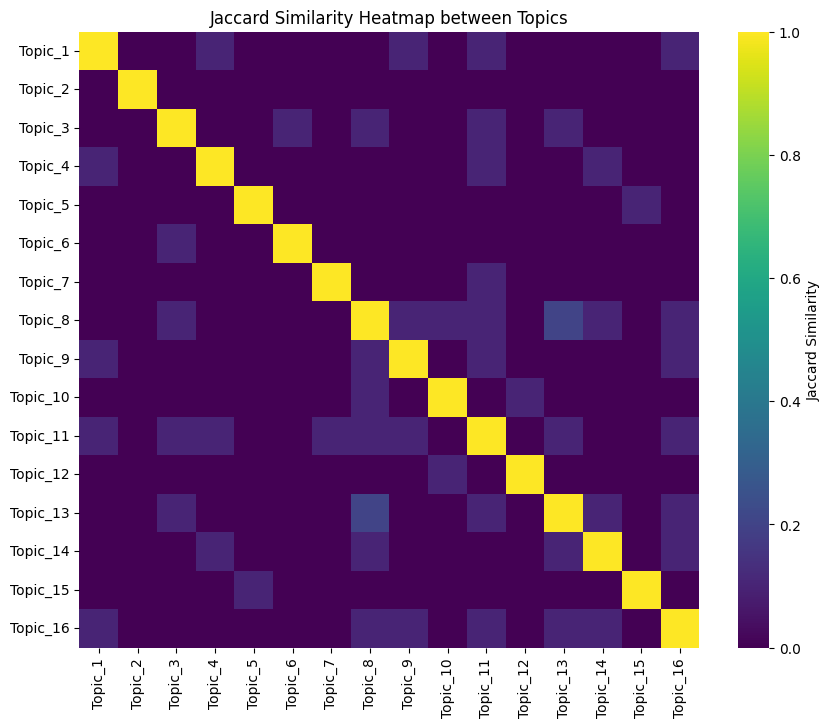

In [ ]:
df = pd.DataFrame(topic_dict)


matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for topic1 in df_topics.columns:
    for topic2 in df_topics.columns:
        set1 = set(df_topics[topic1])
        set2 = set(df_topics[topic2])
        similarity = jaccard_similarity2(set1, set2)
        matrix.loc[topic1, topic2] = similarity

# Convert the matrix values to float
matrix = matrix.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Jaccard Similarity Heatmap between Topics')
plt.show()

# Model 4 , k=16

In [ ]:
k = 16
data_k_16 = data.drop(columns=["tokenized_data" ,"stemmed_data","stemmed_data_flat","count insid","word_count"])

In [ ]:
nmf_model = NMF(n_components=k)
w = nmf_model.fit_transform(dtm)
h = nmf_model.components_

In [ ]:
topic_dict={}
for topic_idx, topic in enumerate(h):
    top_terms_idx = topic.argsort()[:-10-1:-1]
    top_terms = [vocabulaire[i] for i in top_terms_idx]
    tem_list=[]
    for term in top_terms:
        tem_list.append(term)
    topic_dict[f"Topic_{topic_idx + 1}"]=tem_list
topic_dict

{'Topic_1': ['method',
  'imag',
  'propos',
  'object',
  'idea',
  'segment',
  'consid',
  'data',
  'dataset',
  'resolut'],
 'Topic_2': ['galaxi',
  'mass',
  'redshift',
  'format',
  'observ',
  'stellar',
  'gas',
  'star',
  'evolut',
  'halo'],
 'Topic_3': ['problem',
  'solut',
  'function',
  'equat',
  'consid',
  'optim',
  'regular',
  'convex',
  'comput',
  'stochast'],
 'Topic_4': ['neural',
  'network',
  'layer',
  'deep',
  'train',
  'activ',
  'convolut',
  'consid',
  'architectur',
  'recurr'],
 'Topic_5': ['network',
  'influenc',
  'node',
  'dynam',
  'communiti',
  'spread',
  'user',
  'social',
  'tempor',
  'maxim'],
 'Topic_6': ['flow',
  'curvatur',
  'ricci',
  'manifold',
  'bound',
  'prove',
  'singular',
  'asymptot',
  'solut',
  'surfac'],
 'Topic_7': ['cluster',
  'graph',
  'spectral',
  'defect',
  'radio',
  'xray',
  'similar',
  'point',
  'kmean',
  'cut'],
 'Topic_8': ['model',
  'speech',
  'languag',
  'generat',
  'segment',
  'word',

In [ ]:
topic_columns = [f'Topic_{i+1}' for i in range(k)]
all_topics = pd.DataFrame(data=w, columns=topic_columns)
data_k_16 = pd.concat([data_k_16, all_topics], axis=1)

In [ ]:
data_k_16

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16
0,a evergrowing datasets inside observational as...,0.053577,0.036097,0.002962,0.010115,0.005058,0.007583,0.030033,0.000000,0.000000,0.119949,0.00000,0.002737,0.023895,0.000000,0.000000,0.001314
1,we propose the framework considering optimal t...,0.000000,0.000000,0.092524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.31660,0.000000,0.000000,0.002539,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.014502,0.000000,0.002950,0.000000,0.000375,0.000000,0.000000,0.000000,0.049366,0.014188,0.00000,0.005490,0.288767,0.015533,0.000000,0.036158
3,stars are selfgravitating fluids inside which ...,0.001743,0.049415,0.003939,0.000000,0.000000,0.000000,0.000000,0.009577,0.000000,0.013667,0.00000,0.000000,0.153816,0.000194,0.058703,0.000000
4,deep neural perception and control networks ar...,0.019660,0.000000,0.000000,0.079261,0.116593,0.000000,0.000000,0.033982,0.074840,0.118597,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.001113,0.019201,0.000000,0.020364,0.000000,0.000000,0.002774,0.000000,0.000000,0.20594,0.021576,0.000000,0.000000,0.000000,0.000000
496,currently a detection of very high energy gamm...,0.020858,0.042473,0.012387,0.000000,0.000000,0.000000,0.001650,0.000000,0.013890,0.070369,0.02035,0.000000,0.056423,0.000000,0.034803,0.000000
497,a existence of closed loops of degeneracies in...,0.002057,0.000000,0.000000,0.000000,0.000719,0.006319,0.006054,0.001334,0.012853,0.000000,0.00000,0.096837,0.086296,0.000000,0.000000,0.000000
498,robust pca a problem of pca inside a presence ...,0.024674,0.000787,0.001621,0.000000,0.000000,0.000937,0.000000,0.024132,0.000000,0.001506,0.05596,0.006488,0.010858,0.021419,0.000000,0.053886


In [ ]:
row_sums = data_k_16[['Topic_' + str(i+1) for i in range(k)]].sum(axis=1)
print(row_sums.head(10))

0    0.293317
1    0.411664
2    0.427329
3    0.291056
4    0.442931
5    0.404151
6    0.369330
7    0.391542
8    0.240028
9    0.337367
dtype: float64


Les valeurs ne sommmes pas normaliser !

In [ ]:
row_sums = data_k_16[topic_columns].sum(axis=1)
data_k_16[topic_columns] = data_k_16[topic_columns].div(row_sums, axis=0)

In [ ]:
data_k_16

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16
0,a evergrowing datasets inside observational as...,0.182658,0.123063,0.010097,0.034485,0.017243,0.025852,0.102391,0.000000,0.000000,0.408938,0.000000,0.009330,0.081463,0.000000,0.000000,0.004480
1,we propose the framework considering optimal t...,0.000000,0.000000,0.224757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769074,0.000000,0.000000,0.006168,0.000000,0.000000
2,nanostructures with open shell transition meta...,0.033936,0.000000,0.006903,0.000000,0.000879,0.000000,0.000000,0.000000,0.115522,0.033202,0.000000,0.012848,0.675748,0.036349,0.000000,0.084614
3,stars are selfgravitating fluids inside which ...,0.005988,0.169779,0.013534,0.000000,0.000000,0.000000,0.000000,0.032905,0.000000,0.046958,0.000000,0.000000,0.528477,0.000668,0.201690,0.000000
4,deep neural perception and control networks ar...,0.044385,0.000000,0.000000,0.178946,0.263229,0.000000,0.000000,0.076721,0.168965,0.267754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,0.000000,0.004107,0.070862,0.000000,0.075154,0.000000,0.000000,0.010236,0.000000,0.000000,0.760016,0.079625,0.000000,0.000000,0.000000,0.000000
496,currently a detection of very high energy gamm...,0.076346,0.155464,0.045339,0.000000,0.000000,0.000000,0.006038,0.000000,0.050841,0.257571,0.074487,0.000000,0.206525,0.000000,0.127388,0.000000
497,a existence of closed loops of degeneracies in...,0.009682,0.000000,0.000000,0.000000,0.003384,0.029742,0.028494,0.006281,0.060491,0.000000,0.000000,0.455770,0.406158,0.000000,0.000000,0.000000
498,robust pca a problem of pca inside a presence ...,0.121987,0.003889,0.008014,0.000000,0.000000,0.004633,0.000000,0.119308,0.000000,0.007444,0.276666,0.032075,0.053680,0.105893,0.000000,0.266412


In [ ]:
data_k_16['DominantTopic'] = data_k_16[topic_columns].idxmax(axis=1)

## max topic
#max_contributions = data_k_13[topic_columns].max(axis=1)

## (1/4 of the maximum)
#threshold = max_contributions / 4.0

## all
#data_k_13['DominantTopicContent'] = data_k_13.apply(lambda row: ', '.join(top_terms for top_terms in row[topic_columns].sort_values(ascending=False).index if row[top_terms] >= threshold[row.name]), axis=1)

In [ ]:
data_k_16['DominantTopic'] = data_k_16[topic_columns].idxmax(axis=1)

# max topic
max_contributions = data_k_16[topic_columns].max(axis=1)

# (1/2 of the maximum)
threshold = max_contributions / 4

# all
data_k_16['DominantTopicContent'] = data_k_16.apply(lambda row: ', '.join(term for topic, terms in topic_dict.items() if row[topic] >= threshold[row.name] and topic in topic_dict for term in terms), axis=1)


In [ ]:
data_k_16.head(5)

,ABSTRACT,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,0.182658,0.123063,0.010097,0.034485,0.017243,0.025852,0.102391,0.000000,0.000000,0.408938,0.000000,0.009330,0.081463,0.000000,0.00000,0.004480,Topic_10,"method, imag, propos, object, idea, segment, c..."
1,we propose the framework considering optimal t...,0.000000,0.000000,0.224757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769074,0.000000,0.000000,0.006168,0.00000,0.000000,Topic_11,"problem, solut, function, equat, consid, optim..."
2,nanostructures with open shell transition meta...,0.033936,0.000000,0.006903,0.000000,0.000879,0.000000,0.000000,0.000000,0.115522,0.033202,0.000000,0.012848,0.675748,0.036349,0.00000,0.084614,Topic_13,"magnet, spin, field, phase, superconduct, stat..."
3,stars are selfgravitating fluids inside which ...,0.005988,0.169779,0.013534,0.000000,0.000000,0.000000,0.000000,0.032905,0.000000,0.046958,0.000000,0.000000,0.528477,0.000668,0.20169,0.000000,Topic_13,"galaxi, mass, redshift, format, observ, stella..."
4,deep neural perception and control networks ar...,0.044385,0.000000,0.000000,0.178946,0.263229,0.000000,0.000000,0.076721,0.168965,0.267754,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,Topic_10,"neural, network, layer, deep, train, activ, co..."


In [ ]:
data_k_16.drop(columns=topic_columns, inplace=True)

In [ ]:
data_k_16.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent
0,a evergrowing datasets inside observational as...,Topic_10,"method, imag, propos, object, idea, segment, c..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, equat, consid, optim..."
2,nanostructures with open shell transition meta...,Topic_13,"magnet, spin, field, phase, superconduct, stat..."


In [ ]:
temps_data = full_data.drop(columns=['id','ABSTRACT'])

In [ ]:
data_k_16 = pd.concat([data_k_16, temps_data], axis=1)

In [ ]:
data_k_16.head(3)

,ABSTRACT,DominantTopic,DominantTopicContent,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,a evergrowing datasets inside observational as...,Topic_10,"method, imag, propos, object, idea, segment, c...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, equat, consid, optim...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nanostructures with open shell transition meta...,Topic_13,"magnet, spin, field, phase, superconduct, stat...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
binary_columns = data_k_16.columns[3:]
data_k_16.columns[3:]

Index(['Computer Science', 'Mathematics', 'Physics', 'Statistics',
       'Analysis of PDEs', 'Applications', 'Artificial Intelligence',
       'Astrophysics of Galaxies', 'Computation and Language',
       'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control'],
      dtype='object')

In [ ]:
data_k_16['ActiveFields'] = data_k_16[binary_columns].apply(lambda row: ', '.join(binary_columns[row == 1]), axis=1)
data_k_16.drop(columns=binary_columns, inplace=True)

In [ ]:
data_k_16

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_10,"method, imag, propos, object, idea, segment, c...","Physics, Cosmology and Nongalactic Astrophysic..."
1,we propose the framework considering optimal t...,Topic_11,"problem, solut, function, equat, consid, optim...","Computer Science, Data Structures and Algorithms"
2,nanostructures with open shell transition meta...,Topic_13,"magnet, spin, field, phase, superconduct, stat...","Physics, Strongly Correlated Electrons"
3,stars are selfgravitating fluids inside which ...,Topic_13,"galaxi, mass, redshift, format, observ, stella...","Physics, Fluid Dynamics"
4,deep neural perception and control networks ar...,Topic_10,"neural, network, layer, deep, train, activ, co...","Computer Science, Computer Vision and Pattern ..."
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,"algorithm, agent, consid, propos, match, time,...","Computer Science, Data Structures and Algorithms"
496,currently a detection of very high energy gamm...,Topic_10,"method, imag, propos, object, idea, segment, c...","Physics, Instrumentation and Methods for Astro..."
497,a existence of closed loops of degeneracies in...,Topic_12,"group, algebra, modul, construct, finit, quoti...","Physics, Materials Science"
498,robust pca a problem of pca inside a presence ...,Topic_11,"method, imag, propos, object, idea, segment, c...","Statistics, Machine Learning"


In [ ]:
data_k_16['DominantTopicContent']=data_k_16['DominantTopicContent'].apply(remove_numeric_and_punctuations)
data_k_16['ActiveFields']=data_k_16['ActiveFields'].apply(remove_numeric_and_punctuations)

In [ ]:
data_k_16

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields
0,a evergrowing datasets inside observational as...,Topic_10,method imag propos object idea segment consid ...,Physics Cosmology and Nongalactic Astrophysics...
1,we propose the framework considering optimal t...,Topic_11,problem solut function equat consid optim regu...,Computer Science Data Structures and Algorithms
2,nanostructures with open shell transition meta...,Topic_13,magnet spin field phase superconduct state ele...,Physics Strongly Correlated Electrons
3,stars are selfgravitating fluids inside which ...,Topic_13,galaxi mass redshift format observ stellar gas...,Physics Fluid Dynamics
4,deep neural perception and control networks ar...,Topic_10,neural network layer deep train activ convolut...,Computer Science Computer Vision and Pattern R...
...,...,...,...,...
495,given the rectilinear domain mathcalp of h pai...,Topic_11,algorithm agent consid propos match time optim...,Computer Science Data Structures and Algorithms
496,currently a detection of very high energy gamm...,Topic_10,method imag propos object idea segment consid ...,Physics Instrumentation and Methods for Astrop...
497,a existence of closed loops of degeneracies in...,Topic_12,group algebra modul construct finit quotient s...,Physics Materials Science
498,robust pca a problem of pca inside a presence ...,Topic_11,method imag propos object idea segment consid ...,Statistics Machine Learning


In [ ]:
data_k_16['DominantTopicContent'] = [word_tokenize(doc) for doc in data_k_16['DominantTopicContent']]
data_k_16['DominantTopicContent'] = [stem_docs(doc) for doc in data_k_16['DominantTopicContent']]
data_k_16['ActiveFields'] = [word_tokenize(doc) for doc in data_k_16['ActiveFields']]
data_k_16['ActiveFields'] = [stem_docs(doc) for doc in data_k_16['ActiveFields']]
data_k_16['ActiveFields'] = data_k_16['ActiveFields'].apply(lambda x: list(set(x)))

In [ ]:
data_k_16['similarity'] = data_k_16.apply(jaccard_similarity, axis=1)

In [ ]:
data_k_16.head(14)

,ABSTRACT,DominantTopic,DominantTopicContent,ActiveFields,similarity
0,a evergrowing datasets inside observational as...,Topic_10,"[method, imag, propo, object, idea, segment, c...","[astrophys, method, physic, cosmolog, nongalac...",0.166667
1,we propose the framework considering optimal t...,Topic_11,"[problem, solut, function, equat, consid, opti...","[data, scienc, algorithm, comput, structur]",0.400000
2,nanostructures with open shell transition meta...,Topic_13,"[magnet, spin, field, phase, superconduct, sta...","[physic, correl, electron, strong]",0.250000
3,stars are selfgravitating fluids inside which ...,Topic_13,"[galaxi, mass, redshift, format, observ, stell...","[physic, fluid, dynam]",0.000000
4,deep neural perception and control networks ar...,Topic_10,"[neural, network, layer, deep, train, activ, c...","[scienc, vision, machin, learn, recognit, patt...",0.000000
5,analyzing job hopping behavior was important c...,Topic_6,"[network, influenc, node, dynam, communiti, sp...","[inform, network, social, scienc, comput]",0.600000
6,a need to reason about uncertainty inside larg...,Topic_3,"[problem, solut, function, equat, consid, opti...","[machin, learn, statist]",0.666667
7,period approximation was one of a central topi...,Topic_16,"[model, speech, languag, generat, segment, wor...","[astrophys, statist, physic, machin, learn, ap...",0.125000
8,nowadays data compressors are applied to many ...,Topic_16,"[featur, attent, extract, visual, predict, eye...","[mathemat, inform, statist, scienc, theori, co...",0.333333
9,inside this work the manybody potential of nb ...,Topic_7,"[cluster, graph, spectral, defect, radio, xray...","[scienc, physic, materi]",0.000000


In [ ]:
print("le degree de similarité entre les topics et classes de chaque doc :", data_k_16['similarity'].mean())
similarities_list.append(data_k_16["similarity"].mean())

le degree de similarité entre les topics et classes de chaque doc : 0.20977878787878787


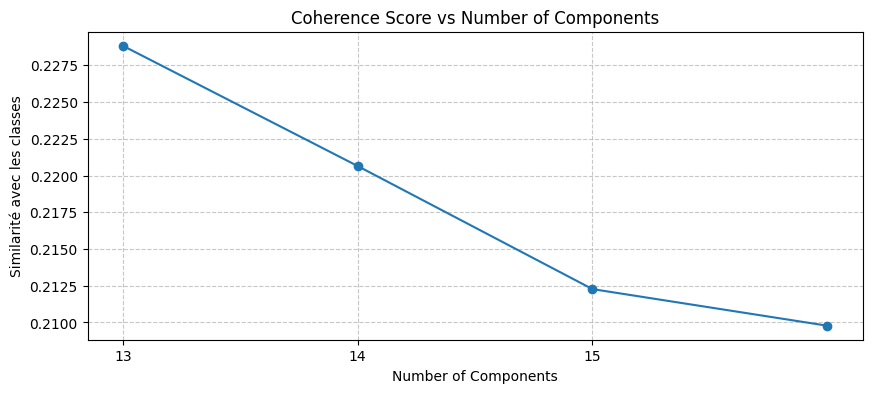

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot([13,14,15,16], similarities_list, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Similarité avec les classes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(13, 16, 1))
plt.title('Coherence Score vs Number of Components')
plt.show()

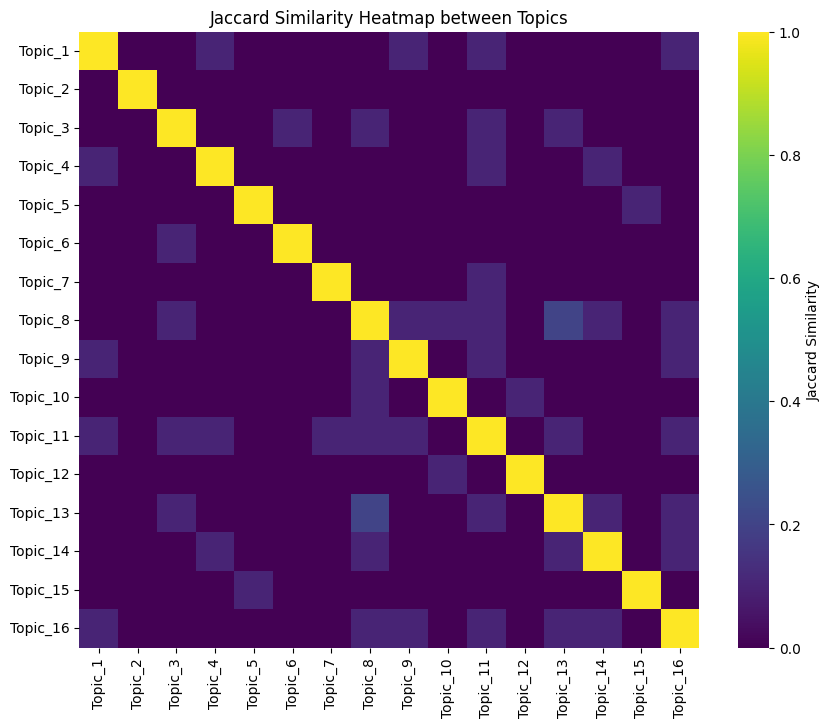

In [ ]:
df = pd.DataFrame(topic_dict)


matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for topic1 in df_topics.columns:
    for topic2 in df_topics.columns:
        set1 = set(df_topics[topic1])
        set2 = set(df_topics[topic2])
        similarity = jaccard_similarity2(set1, set2)
        matrix.loc[topic1, topic2] = similarity

# Convert the matrix values to float
matrix = matrix.astype(float)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Jaccard Similarity Heatmap between Topics')
plt.show()